In [2]:
# Loading libraries for the course
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations
from skimage import filters, measure, segmentation, color
from scipy.ndimage import gaussian_filter
from skimage.filters import difference_of_gaussians
import pandas as pd
from cellpose import models, plot
from scipy import ndimage as ndi
import os
import ast

Plot the number of viable cells

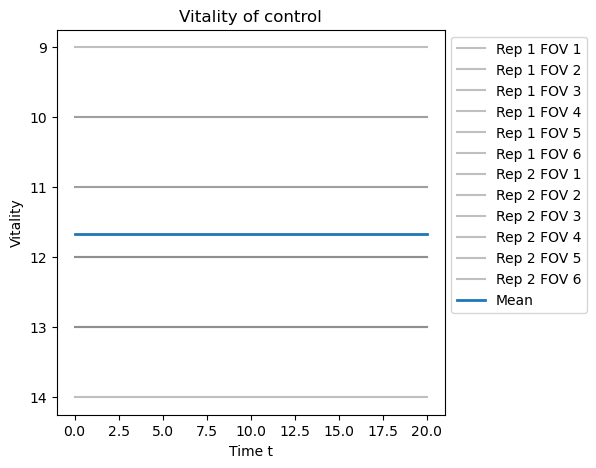

In [27]:
folder_name = '../NoDrug'
rep_num = 2
FOV_num = 6

total_viable_cells = []

plt.figure(figsize = (5,5))
for i in range(1, rep_num+1):
    for j in range(1, FOV_num+1):
        data_path = folder_name + '/rep' + str(i) + '_FOV' + str(j) + '/'
        data = pd.read_csv(data_path + 'viable_cells.csv')

        t = range(data.shape[1]) # time points
        viable_cell = data.iloc[0].astype(float).tolist() # viable cell count
        plt.plot(t, viable_cell, alpha = 0.5, color = 'gray', label = f'Rep {i} FOV {j}')
        total_viable_cells.append(viable_cell)

mean_viable_cells = np.mean(total_viable_cells, axis = 0)
plt.plot(t, mean_viable_cells, alpha = 1, linewidth = 2, label = 'Mean')
plt.xlabel('Time t')
plt.ylabel('Vitality')
plt.gca().invert_yaxis() # invert y axis
plt.title('Vitality of control')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Plot the number of mean nuclear mRNA

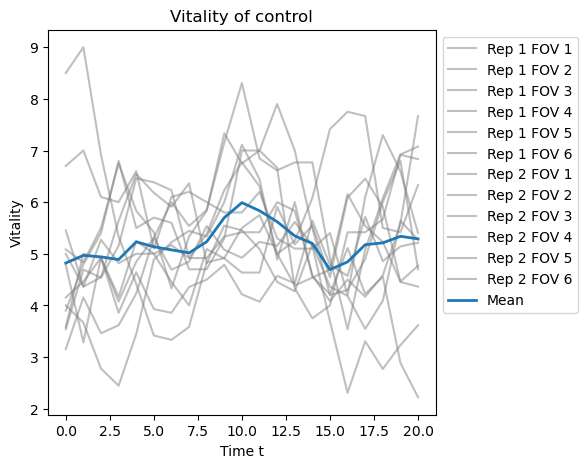

In [61]:
total_mRNA_nuc = []
plt.figure(figsize = (5,5))
for i in range(1, rep_num+1):
    for j in range(1, FOV_num+1):
        data_path = folder_name + '/rep' + str(i) + '_FOV' + str(j) + '/'
        data = pd.read_csv(data_path + 'mRNAs_in_nucleus.csv')
        viability_data = pd.read_csv(data_path + 'viable_cells.csv')

        t = range(viability_data.shape[1]) # time points
        mRNA_nuc = []
        
        for k in range(viability_data.shape[1]):
            mRNA_nuc_total = 0
            via_cell_num = float(viability_data.iloc[0,k])
            viable_cell = ast.literal_eval(viability_data.iloc[1,k])# viable cell count
            for n in viable_cell:
                mRNA_nuc_total += data.iloc[n-1, k+1].astype(float)
            mRNA_nuc.append(mRNA_nuc_total/via_cell_num)
        plt.plot(t, mRNA_nuc, alpha = 0.5, color = 'gray', label = f'Rep {i} FOV {j}')
        total_mRNA_nuc.append(mRNA_nuc)

mean_mRNA_nuc = np.mean(total_mRNA_nuc, axis = 0)

plt.plot(t, mean_mRNA_nuc, alpha = 1, linewidth = 2, label = 'Mean')
plt.xlabel('Time t')
plt.ylabel('Vitality')
plt.title('Vitality of control')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()